# Mini Projet: The Monty Hall Problem
<html>
   <head>
      <title>HTML Base Tag Example</title>
   </head>
  

</html>

|    nom   | prenom  | classe | groupe |
|----------|---------|--------|--------|
|  ZANINA  |  Sirine | 2LM1   | TP2    |

![Monty Hall](MontyHall.png)

Vous participez à un jeu télévisé où l'animateur vous présente trois portes. Quelle que soit la porte que vous choisissez, vous pouvez garder ce qui se trouve derrière. Deux des portes ont des chèvres derrière elles, et l'une d'entre elles a une voiture toute neuve (c'est celle que vous voulez... sauf si vous aimez vraiment les chèvres).

* 1er tour : l'animateur vous demande de choisir une porte - vous faites votre choix parmi les trois portes disponibles.

* 2ème tour : l'animateur décide alors de vous aider en ouvrant l'une des portes restantes ; il ouvre toujours une porte de chèvre restante. Il reste donc deux portes non ouvertes - celle que vous avez choisie au départ, et l'autre non ouverte. L'animateur vous demande alors si vous souhaitez revenir sur votre décision.

<b>Que devriez-vous faire ?</b>

* Pour la plupart des gens, y compris moi-même, votre intuition vous dirait que cela n'a pas vraiment d'importance. Il reste maintenant deux portes - l'une contient la chèvre, l'autre la voiture... c'est comme le lancer d'une pièce de monnaie... que vous restiez sur votre choix initial ou que vous changiez de porte, vous avez une probabilité de 50% d'obtenir la voiture. Cela semble logique à première vue.

Cependant, si vous examinez ce problème à l'aide de statistiques et de probabilités, il devient clair que changer de porte est une bien meilleure décision. Mais pourquoi ?


In [5]:
#Import the libraries
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Create a function for the host to reveal a door that doesn't contain the prize and a door that isn't the contestants/players originical choice

def get_non_prize_door(host, num_doors, player_choice):
    i=1
    while(i==host or i==player_choice):
        i = (i+1)%(num_doors)
    return i


In [7]:
#Create a function to have the player switch to the other unopened door

def switch_function(shown_door, num_doors, player_choice):
    i=1
    while(i==shown_door or i==player_choice):
        i = (i+1)%(num_doors)
    return i


In [17]:
# Create a function to simulate the game

def monty_hall(switch, num_tests):
    win_switch_count = 0
    win_no_switch_count= 0
    lose_switch_count = 0
    lose_no_switch_count= 0

    doors = [0,1,2]
    num_doors = len(doors)

    # Loop throught the number of times the contestant/player is gonna play the game.
    for i in range(0, num_tests):
        door_with_prize = random.randint(0, num_doors-1) #Choose randomly a door between [0,2]
        host = door_with_prize
        player_choice = random.randint(0, num_doors-1)
        original_player_choice = player_choice
        shown_door = get_non_prize_door(host, num_doors, player_choice)

        #If the player chooses to always switch, then allow the player to switch their original chosen door
        #to the other unopened door

        if switch == True:
            player_choice = switch_function(shown_door, num_doors, player_choice)
        
        if player_choice == door_with_prize and switch == False:
            #Then the player wins from not switching
            print('Player Wins (No switch) - The player chose door :',player_choice,' Original door choice:',
            original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            win_no_switch_count+=1

        elif player_choice == door_with_prize and switch == True:
            #Then the player wins from switching
            print('Player Wins (switch) - The player chose door :',player_choice,' Original door choice:',
            original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            win_switch_count+=1
        
        elif player_choice != door_with_prize and switch == False:
            #Then the player lost from not switching
            print('Player Lost (No switch) - The player chose door :',player_choice,' Original door choice:',
            original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            lose_no_switch_count+=1

        elif player_choice != door_with_prize and switch == True:
            #Then the player lost from switching
            print('Player Lost (switch) - The player chose door :',player_choice,' Original door choice:',
            original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            lose_switch_count+=1

        else:
            print("SOMETHING IS WRONG")
    
    return win_no_switch_count, win_switch_count,lose_no_switch_count,lose_switch_count, num_tests



In [21]:
#Play the game

x = monty_hall(True, 10)

Player Wins (switch) - The player chose door : 1  Original door choice: 2  Door with prize:  1  Shown door:  0
Player Lost (switch) - The player chose door : 2  Original door choice: 0  Door with prize:  0  Shown door:  1
Player Wins (switch) - The player chose door : 2  Original door choice: 1  Door with prize:  2  Shown door:  0
Player Wins (switch) - The player chose door : 2  Original door choice: 1  Door with prize:  2  Shown door:  0
Player Lost (switch) - The player chose door : 0  Original door choice: 1  Door with prize:  1  Shown door:  2
Player Wins (switch) - The player chose door : 0  Original door choice: 2  Door with prize:  0  Shown door:  1
Player Wins (switch) - The player chose door : 1  Original door choice: 0  Door with prize:  1  Shown door:  2
Player Wins (switch) - The player chose door : 2  Original door choice: 1  Door with prize:  2  Shown door:  0
Player Lost (switch) - The player chose door : 0  Original door choice: 2  Door with prize:  2  Shown door:  1
P

In [22]:
#Get the win & lost percentage for switching or not switching

print('Win switch %: ', x[1]/x[4])
print('Lose switch %: ', x[3]/x[4])
print('Win no switch %: ', x[0]/x[4])
print('Lose no switch %: ', x[2]/x[4])

Win switch %:  0.6
Lose switch %:  0.4
Win no switch %:  0.0
Lose no switch %:  0.0


In [23]:
# Créer une fonction pour simuler le jeu

def monty_hall2(switch, num_tests):
    win_switch_count = 0
    win_no_switch_count= 0
    lose_switch_count = 0
    lose_no_switch_count= 0

    doors = [0,1,2]
    num_doors = len(doors)

    # Créer un boucle pour les nombres des fois qu'un joueur peut jouer.
    for i in range(0, num_tests):
        door_with_prize = random.randint(0, num_doors-1) #Choisir aléatoirement un porte entre [0,2]
        host = door_with_prize
        player_choice = random.randint(0, num_doors-1)
        original_player_choice = player_choice
        shown_door = get_non_prize_door(host, num_doors, player_choice)

        #If the player chooses to always switch, then allow the player to switch their original chosen door
        #to the other unopened door

        if switch == True:
            player_choice = switch_function(shown_door, num_doors, player_choice)
        
        if player_choice == door_with_prize and switch == False:
            #Then the player wins from not switching
           # print('Player Wins (No switch) - The player chose door :',player_choice,' Original door choice:',
            #original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            win_no_switch_count+=1

        elif player_choice == door_with_prize and switch == True:
            #Then the player wins from switching
            #print('Player Wins (switch) - The player chose door :',player_choice,' Original door choice:',
            #original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            win_switch_count+=1
        
        elif player_choice != door_with_prize and switch == False:
            #Then the player lost from not switching
            #print('Player Lost (No switch) - The player chose door :',player_choice,' Original door choice:',
            #original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            lose_no_switch_count+=1

        elif player_choice != door_with_prize and switch == True:
            #Then the player lost from switching
            #print('Player Lost (switch) - The player chose door :',player_choice,' Original door choice:',
            #original_player_choice, ' Door with prize: ',door_with_prize,' Shown door: ',shown_door)
            lose_switch_count+=1
            
    return win_no_switch_count, win_switch_count,lose_no_switch_count,lose_switch_count, num_tests



In [28]:
#Play the game

x = monty_hall2(True, 100_000)

In [29]:
#Get the win & lost percentage for switching or not switching

print('Win switch %: ', x[1]/x[4])
print('Lose switch %: ', x[3]/x[4])
print('Win no switch %: ', x[0]/x[4])
print('Lose no switch %: ', x[2]/x[4])

Win switch %:  0.66607
Lose switch %:  0.33393
Win no switch %:  0.0
Lose no switch %:  0.0


In [ ]:
#If we run this game 100_000 times we get a 66% chance of winning and 33% chance of losing.

In [37]:
#Get the data to create a visualization of the number of simulated tests/games played
#and the percentage of wins from always switching

num_tests = []
win_percentage = []
switch = True

#Run up to 10_000 simulated games

for i in range(1,10_001):
    num_tests.append(i)
    y= monty_hall2(switch, i)
    win_percentage.append(y[1]/y[4])




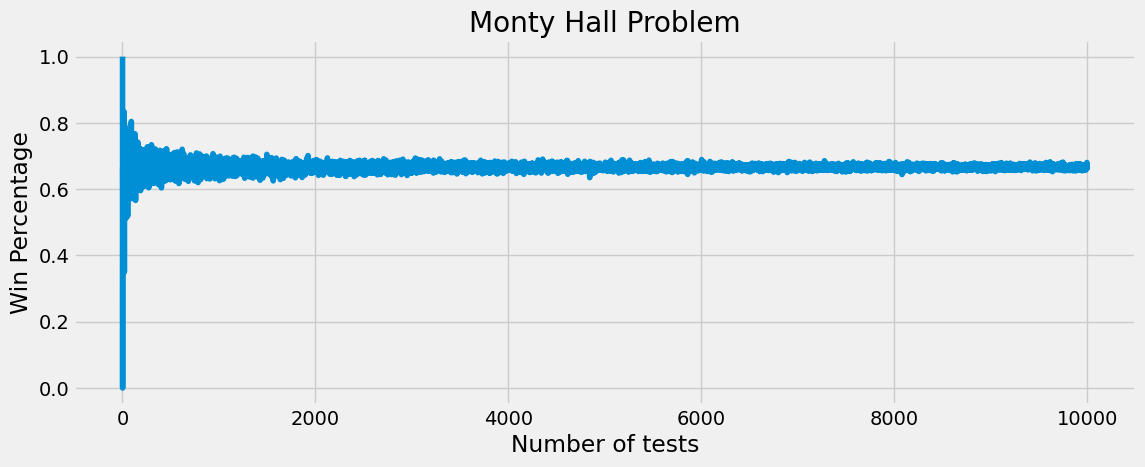

In [38]:
#Visually show the number of tests and the win percentage from always switching

plt.figure(figsize=(12.2, 4.5))
plt.plot(num_tests, win_percentage)
plt.title('Monty Hall Problem')
plt.xlabel('Number of tests')

plt.ylabel('Win Percentage')
plt.show()


In [39]:
print('The win percentage for test playing ',y[4],'games is: ',y[1]/y[4] * 100, '%')

The win percentage for test playing  10000 games is:  66.97999999999999 %


----

# Explanation

Suppose the player initially chooses <b>`door 1`</b>:
* The door that has the car can either be door number <b>`1`</b> , <b>`2`</b> or <b>`3`</b>. 
* Let C : the event that the contestant opens the car door.
* <b>`P(C)`</b> : the probability of opening the car door.

$$P(C =1,2,3)=\dfrac{1}{3}$$ 

* Let M : the event that Monty opens the door.
* <b>`P(M)`</b>: the probability of Monty opening the door.
* <b>`P(M = 2)`</b>: the probability of Monty opening the door number 2.

$$P(C =1 \cap M = 2 )=\dfrac{1}{2}$$ 
$$P(C =1 \cap M = 3 )=\dfrac{1}{2}$$ 
$$P(C =2\cap M = 3 )=1$$ 
$$P(C =3\cap M = 2 )=1$$ 

* <b>`P(C = 1| M = 2)`</b>: the probability of Monty Hall opening the door number 2 <b>`knowing that the car is in
door number 1`</b>, etc.

$$P(C =1 | M = 2 )=\dfrac{1}{3}$$ 

=> Conditioning on Monty Hall opening door 2, there's a 1/3 chance that the car is behind door 1.

$$P(C =3 | M =2 )=\dfrac{2}{3}$$ 

=> Conditioning on Monty Hall opening door 2, there's a 2/3 chance that the car is behind door 3.

<b>`Conclusion: `</b>

$$P(SuccessIfSwitch|MontyOpensDoor{2})=\dfrac{2}{3}$$ 






* The same goes for when the player chooses door 2 or door 3.








----

# Law of Total Probability


The Law of Total Probability could be thought as <em>**Wishful Thinking.** </em> <br>
**What do we wish we knew?**

Naturally, we wish we knew where the car was. So we're gonna condition on that.

* Let S: be the event that we <em>**succeed (assuming we switch)** </em>
* Let D_j : Door j has car (j in [1,2,3])

Note: 
$$P(D_1)=P(D_2)=P(D_3)=\dfrac{1}{3}$$

Applying the Law of Total Probability:

$$P(S)=P(S|D_1)\times\dfrac{1}{3} + P(S|D_2)\times\dfrac{1}{3} + P(S|D_3)\times\dfrac{1}{3}$$
$$= 0 + 1\times\dfrac{1}{3}+ 1\times\dfrac{1}{3}$$
$$ = \dfrac{2}{3} $$

By symmetry: 

$$P(S|MontyOpens2)=\dfrac{2}{3}$$

----